# Task 1: Data Preparation


**Objective:** The aim of this task is to carefully inspect and prepare the provided Daily Rainfall Climate Data from the Australian Government's Bureau of Meteorology for analysis. This involves loading the CSV data from the specified file, ensuring its equivalence to the source, and addressing any potential issues or errors through data cleaning techniques taught in lectures. Finally, the cleaned data will be saved into a comma-separated values (CSV) file named 'cleaned_version.csv', ready for further analysis.

Let's start by loading the data which contains daily 
rainfall climate data between 2013 and 2023 in ABC city

In [2]:
# Read csv in dataframe and check for bad lines
import pandas as pd

# Load the CSV file into a DataFrame. separtor is ','. Decimal points are '.'. Headers are the first row. We rename the headers.
DRC = pd.read_csv('Data.csv', sep =',', decimal='.', header=0, 
                      names=['year', 'month', 'day', 'Rainfall_mm'], on_bad_lines='warn') # Pandas 2.2 (stable) version in use. Change this to error_bad_line = False if using lesser version of Pandas.

##### Check whether the loaded data is equivalent to the data in the source CSV file

Source data is a csv file, so we visually inspect the loaded data to ensure it matches the expected format and values from the source file.

In [3]:
# Display the first few rows of the DataFrame to inspect the data
DRC.head()

,year,month,day,Rainfall_mm
0,2013,6,2,5.0
1,2013,6,3,0.2
2,2013,6,4,0.2
3,2013,6,5,0.0
4,2013,6,6,0.0


In [4]:
# Our csv file has 3865 rows in total excluding the headers. And 4 columns. Lets Check number of columns and row in our dataframe
DRC.shape

(3865, 4)

Data looks same as in the csv file with 4 columns and 3865 rows. Data is loaded fully.

### Data Cleaning (Data entry, impossible values, missing values, outliers, and sanity check): 

Data cleaning is a multi-step process.
We will look at data entry errors, redundant white spaces, impossible values/sanity checks, missing values, checking for outliers

Lets begin by checking the data types of the columns

In [5]:
# Check data types of the columns.
DRC.dtypes

year             int64
month           object
day             object
Rainfall_mm    float64
dtype: object

Month and day columns are object type probably due to inconsistencies. Lets fix data inconsistencies from all the columns

### Step 1: Handle Data entry errors

We will check the values each column holds. Lets begin with the first column, year

#### For Column 1: 'year'

In [6]:
# Get distinct values for year column
DRC['year'].sort_values().unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
       2027], dtype=int64)

Year 2027 is a future value and not possible. To fix this, lets inspect the rows around this record. 

In [7]:
# Get the index of row(s) where the "Year" column has the value 2027
index_2027 = DRC[DRC['year'] == 2027].index
index_2027

Index([1404], dtype='int64')

In [8]:
# check the rows right before and after row index 1404. 
indices = [1403, 1405] 

# Get the rows at the specified indices
rows = DRC.iloc[indices]

# Print the rows
print("Rows at indices", indices, ":\n", rows)

Rows at indices [1403, 1405] :
       year month day  Rainfall_mm
1403  2017     4   5          0.0
1405  2017     4   7          0.0


It is evident that 2017 was wrongly input as 2027. Lets fix this using the replace()

In [9]:
# Replace year 2027 with 2017
DRC['year'].replace(2027, 2017, inplace=True) # inplace = True makes the changes in the dataframe permanently

Check if the issue is fixed - 

In [10]:
DRC['year'].value_counts().sort_index()

year
2013    213
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    365
Name: count, dtype: int64

#### For Column 2: 'month'

In [11]:
# Get distinct values for month column
DRC['month'].unique()

array(['6', '7', '8', '9', '10', '11', '12', '1', '2', '3', '4', '5',
       'April', 'Jan', nan], dtype=object)

Clearly, April and Jan months are input as strings rather than integers. Fixing this using replace() -

In [12]:
# Replace month Jan and April with 1 and 4 respectively
DRC['month'].replace({'Jan': 1, 'April': 4}, inplace=True)

#### For Column 3: 'day'

In [13]:
# Get distinct values for day column
DRC['day'].unique()

array(['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '1', '31', '48', nan, 'nine',
       '200'], dtype=object)

Values 48, nine and 200 are not possible and are data entry errors. Lets fix them -

##### Fixing day value 48

In [14]:
# Get the index of row(s) where the "day" column has the value 48
index_48 = DRC[DRC['day'] == '48'].index
index_48

Index([1714], dtype='int64')

In [15]:
# check the rows right before and after row index 1714. 
indices = [1713, 1715]  

# Get the rows at the specified indices
rows = DRC.iloc[indices]

# Print the rows
print("Rows at indices", indices, ":\n", rows)

Rows at indices [1713, 1715] :
       year month day  Rainfall_mm
1713  2018     2   9          0.0
1715  2018     2  11          0.0


It is evident that 10 was wrongly input as 48. Fixing this using replace() -

In [16]:
DRC['day'].replace({'48': 10}, inplace=True)

##### Fixing day value 200

In [17]:
# Get the index of row(s) where the "day" column has the value 200
index_200 = DRC[DRC['day'] == '200'].index
index_200

Index([3853], dtype='int64')

In [18]:
# check the rows right before and after row index 3853. 
indices = [3852, 3854]  

# Get the rows at the specified indices
rows = DRC.iloc[indices]

# Print the rows
print("Rows at indices", indices, ":\n", rows)

Rows at indices [3852, 3854] :
       year month day  Rainfall_mm
3852  2023    12  19          4.0
3854  2023    12  21          0.0


20 was typed as 200

In [19]:
DRC['day'].replace({'200': 20}, inplace=True)

##### Fixing day value 'nine'

In [20]:
# Get the index of row(s) where the "day" column has the value 200
index_nine = DRC[DRC['day'] == 'nine'].index
index_nine

Index([2198], dtype='int64')

In [21]:
# check the rows right before and after row index 2198. 
indices = [2197, 2199]  

# Get the rows at the specified indices
rows = DRC.iloc[indices]

# Print the rows
print("Rows at indices", indices, ":\n", rows)

Rows at indices [2197, 2199] :
       year month day  Rainfall_mm
2197  2019     6   8          0.0
2199  2019     6  10          3.0


9 was typed as nine

In [22]:
DRC['day'].replace({'nine': 9}, inplace=True)

#### For Column 4: 'rainfall_mm'

In [23]:
DRC['Rainfall_mm'].value_counts().sort_index()

Rainfall_mm
-10.0           1
 0.0         2312
 0.2          271
 0.4          128
 0.6           95
             ... 
 43.8           1
 44.0           1
 45.4           1
 54.6           1
 100000.0       1
Name: count, Length: 135, dtype: int64

Clearly, it is hard to check for data entry errors on continous float values. On first glance, we do notice the -10 and 100000 value which is impossible. Hence, lets move to step 2, where we check for impossible values/sanity check

### Step 2: Handle Impossible values and sanity check

For 'Rainfall amount (millimetres)' column, lets check for negative values or values greater than a certain threshold. To determine a threshold, lets chek the second highest value -

In [24]:
DRC['Rainfall_mm'].nlargest(1).iloc[-1]

100000.0

Lets conveniently set the rainfall amount threshold value to 100 mm and Replace negative values with 0 and values greater than 100 with mean rainfall using the following code -

In [25]:
# Calculate mean from a filtered data with no null values, values less than 0, and values greater than 100 of "Rainfall amount" column
filtered_data = DRC.dropna(subset=['Rainfall_mm'])
filtered_data = filtered_data[(filtered_data['Rainfall_mm'] >= 0) & (filtered_data['Rainfall_mm'] <= 100)]

import numpy as np # For simplicity,and extensive functionality in handling numerical data.

# Calculate the mean of the "Rainfall amount" column
rainfall_mean = filtered_data['Rainfall_mm'].mean()
rainfall_mean = round(rainfall_mean,1)

# Replace values less than 0 and greater than 100 with the mean
DRC.loc[DRC['Rainfall_mm'] < 0, 'Rainfall_mm'] = rainfall_mean
DRC.loc[DRC['Rainfall_mm'] > 100, 'Rainfall_mm'] = rainfall_mean

# Verify that the replacement is done
print("Minimum value in 'Rainfall amount' column after replacement:", DRC['Rainfall_mm'].min())
print("Maximum value in 'Rainfall amount' column after replacement:", DRC['Rainfall_mm'].max())

Minimum value in 'Rainfall amount' column after replacement: 0.0
Maximum value in 'Rainfall amount' column after replacement: 54.6


### Step 3: Handle Missing Values

Lets check for missing values in all 4 columns - 

In [26]:
# Check for missing values
print("\nMissing values in the dataset:")
print(DRC.isnull().sum())


Missing values in the dataset:
year           0
month          1
day            1
Rainfall_mm    5
dtype: int64


#### For month column

Get the record with the missing value

In [27]:
DRC[DRC.month.isnull() == 1]

,year,month,day,Rainfall_mm
2067,2019,NaN,29,0.0


In [28]:
# Lets check the rows right before row index 2067 
indices = [2066, 2068]  

# Get the rows at the specified indices
rows = DRC.iloc[indices]

# Print the rows
print("Rows at indices", indices, ":\n", rows)

Rows at indices [2066, 2068] :
       year month day  Rainfall_mm
2066  2019     1  28          0.0
2068  2019     1  30          0.0


Thus, row index 2067 should have month as 1. Lets impute this value

In [29]:
# Impute missing values in the "Month" column with the value 1
DRC['month'] = DRC['month'].fillna(1)

# Verify that missing values in the "Month" column have been filled with 1
print("Missing values in 'month' column after imputation:\n", DRC['month'].isnull().sum())

Missing values in 'month' column after imputation:
 0


#### For day column

Get the record with the missing value

In [30]:
DRC[DRC.day.isnull() == 1]

,year,month,day,Rainfall_mm
1736,2018,3,NaN,0.0


Thus, row index 1736 should have day as 4. Lets impute this value

In [31]:
# Impute missing values in the "Month" column with the value 4
DRC['day'] = DRC['day'].fillna(4)

# Verify that missing values in the "Month" column have been filled with 1
print("Missing values in 'day' column after imputation:\n", DRC['day'].isnull().sum())

Missing values in 'day' column after imputation:
 0


#### For Rainfall Amount column

Lets first check the distribution of Rainfall Amount since imputing missing values with the median is preferred for skewed distributions because it is more robust to outliers, preserves the distribution shape, and helps avoid bias introduced by extreme values.

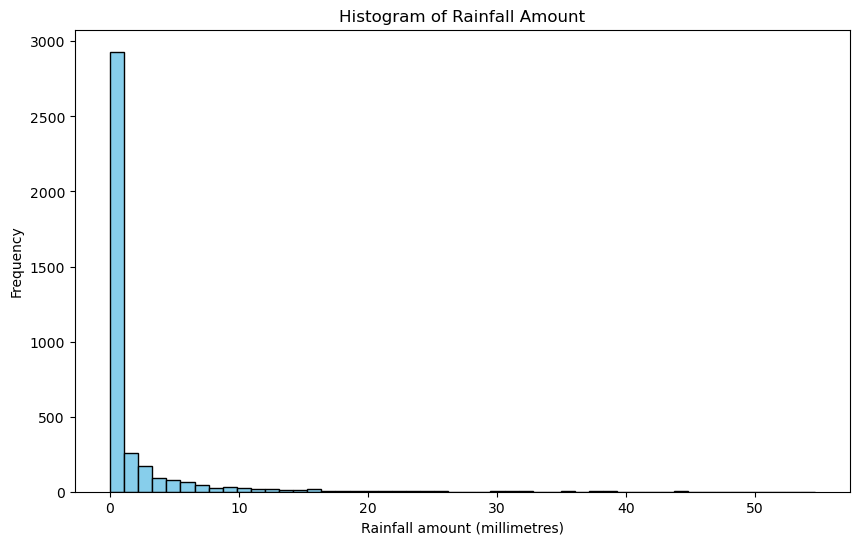

In [32]:
# Handling missing values from Rainfall amount column
import matplotlib.pyplot as plt

# Plot histogram of the "Rainfall amount" column
plt.figure(figsize=(10, 6))
plt.hist(DRC['Rainfall_mm'], color='skyblue', edgecolor='black', bins = 50)
plt.title('Histogram of Rainfall Amount')
plt.xlabel('Rainfall amount (millimetres)')
plt.ylabel('Frequency')
plt.show()

Since the distribution is skewed, lets impute the missing values in Rainfall amount column with the median value rather than mean

In [33]:
# Calculate median value of rainfall_mm column
median_rainfall = DRC['Rainfall_mm'].median() # median is 0.

# Impute missing values in rainfall_mm column with median value
DRC['Rainfall_mm'].fillna(median_rainfall, inplace=True)

Lets check if all the missing values are fixed

In [34]:
# Check for missing values
print("\nMissing values in the dataset:")
print(DRC.isnull().sum())


Missing values in the dataset:
year           0
month          0
day            0
Rainfall_mm    0
dtype: int64


### Step 4: Handle duplicate Values

Lets check for duplicate records in the dataframe using duplicated(). Get a count of the duplicates by summing up the duplicate counts

In [35]:
# Check for duplicates
print("\nDuplicate rows in the dataset:", DRC.duplicated().sum())


Duplicate rows in the dataset: 0


**No duplicates** in our dataset

### Step 5: Check Data Formatting

Data Formatting: Ensure that data types are appropriate for each column. That is, year, month and day values should be in integer format. And Rainfall amount in float format

In [36]:
# Check data types of columns
print("\nData types of columns:")
print(DRC.dtypes)


Data types of columns:
year             int64
month           object
day             object
Rainfall_mm    float64
dtype: object


In [37]:
# Convert Month, and Day columns to integers
DRC['month'] = DRC['month'].astype(int)
DRC['day'] = DRC['day'].astype(int)

In [38]:
print(DRC.dtypes)

year             int64
month            int32
day              int32
Rainfall_mm    float64
dtype: object


### Step 6: Handle Outliers


We can identify outliers in the four columns by employing boxplots and visually examining them. Despite recognizing that outliers would be unlikely in the year, month, and day columns, let's still include them for the sake of practice.

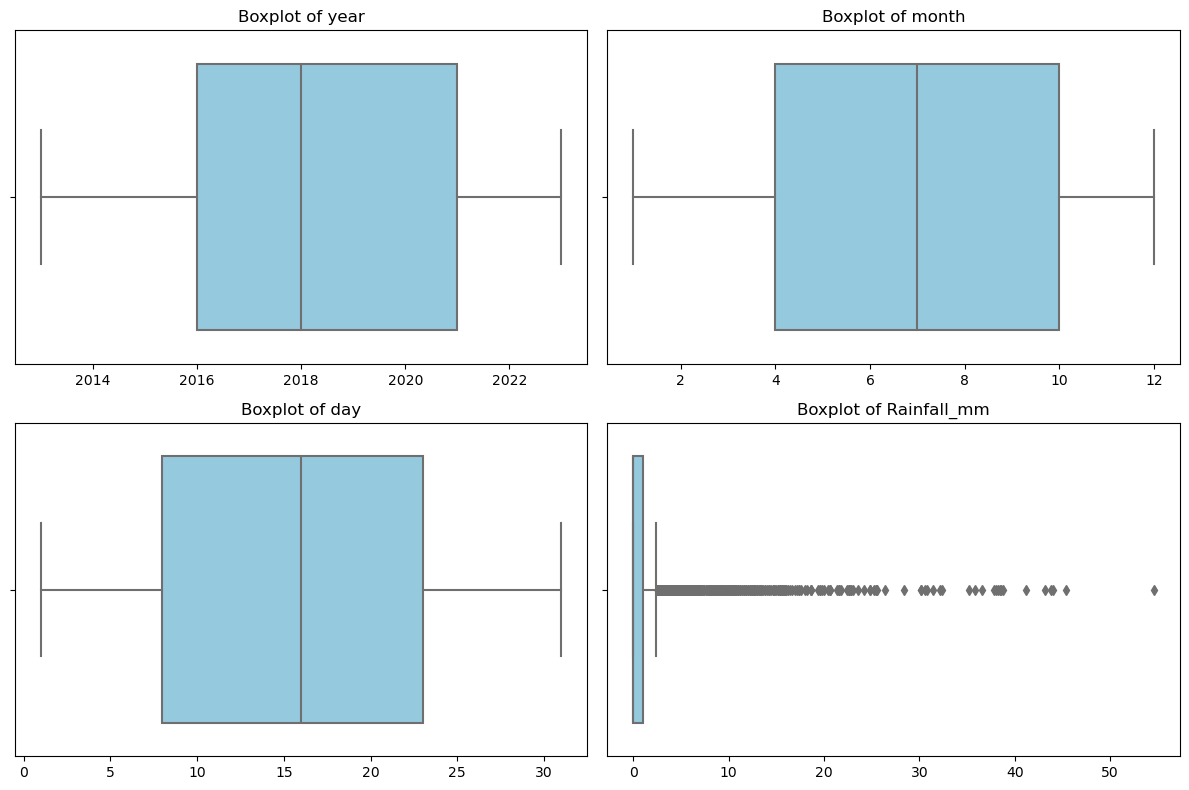

In [39]:
numeric_columns = ['year', 'month', 'day', 'Rainfall_mm']

import seaborn as sns

# Creating boxplots for each numeric column to visualize outliers
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=DRC[column], color='skyblue')
    plt.title(f'Boxplot of {column}')
    plt.xlabel('')
plt.tight_layout()
plt.show()

Clearly, year, month and day columns have zero outliers and it obvious. Focusing on the boxplot of Rainfall amount alone,

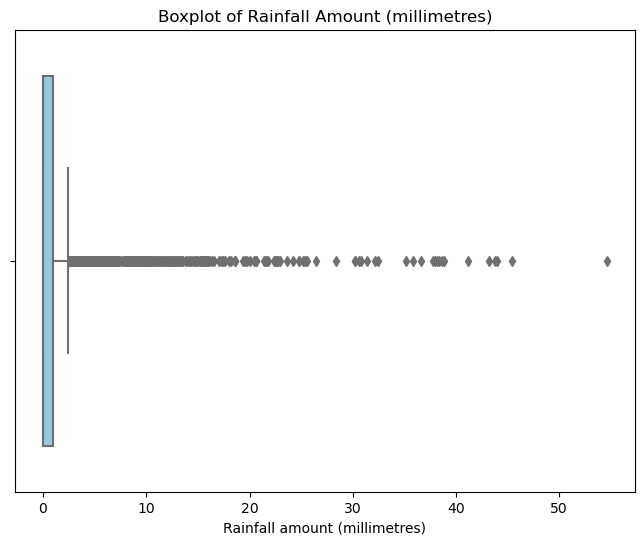

In [40]:
# Selecting the "Rainfall amount (millimetres)" column
rainfall_column = DRC['Rainfall_mm']

# Creating a boxplot to visualize outliers in the "Rainfall amount (millimetres)" column
plt.figure(figsize=(8, 6))
sns.boxplot(x=rainfall_column, color='skyblue')
plt.title('Boxplot of Rainfall Amount (millimetres)')
plt.xlabel('Rainfall amount (millimetres)')
plt.show()

We observe that a significant portion of the records are classified as outliers. This is primarily due to the dominance of the value count for rainfall amounts ranging from 0 to 1 mm compared to the count for rainfall amounts exceeding 1 mm.

In [41]:
DRC['Rainfall_mm'].value_counts()

Rainfall_mm
0.0     2317
0.2      271
0.4      128
0.6       95
0.8       75
        ... 
16.2       1
16.6       1
41.2       1
44.0       1
38.4       1
Name: count, Length: 133, dtype: int64

Finally, lets check if we lost any record during data prepartion stage. Remember, our dataset had 3865 rows and 4 columns. Lets check this again -

In [42]:
DRC.shape

(3865, 4)

Note, since there are no string type columns, we will not be checking for white spaces in our dataset

**OUR DATA IS CLEAN NOW**

##### Write the cleaned data into a comma-separated values (csv) file(s) accordingly, e.g. (file can be named as ‘cleaned version.csv’).

In [43]:
# Write the cleaned data into a new CSV file
cleaned_file_path = "cleaned_version.csv"
DRC.to_csv(cleaned_file_path, index=False)

print("\nCleaned data has been written to:", cleaned_file_path)


Cleaned data has been written to: cleaned_version.csv


# Task 2: Data Exploration

## Task 2.1 

Prepare and convert the data in 2014 as a pandas DataFrame with rows as the days in a month and columns as the months in a year (e.g. row 1 contains the rainfall data in the 1st day of each month; row 2 contains the rainfall data in the 2nd day of each month, ...). Then, explore the highest daily rainfall in each month.

Code below achieves the above require dataframe -

In [44]:
# Filter data for the year 2014
DRC_2014 = DRC[DRC['year'] == 2014]
DRC_2014.shape

(365, 4)

In [45]:
# Create a pivot table to reshape the data with rows as days, and columns and month for 2014 rainfall amount
pivot_table = DRC_2014.pivot_table(index='day', columns='month', values='Rainfall_mm')
pivot_table

month,1,2,3,4,5,6,7,8,9,10,11,12
day,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,3.8,0.4,5.2,0.0,2.6,6.0,0.0
2,5.2,0.0,0.0,0.0,0.0,3.2,0.0,10.6,10.8,0.0,0.2,0.4
3,0.0,0.0,0.0,0.2,1.4,3.4,0.0,0.6,0.2,0.6,0.0,0.0
4,0.0,0.4,0.0,0.0,5.6,1.6,0.0,0.0,0.0,0.2,0.0,9.0
5,0.2,0.0,0.0,0.0,1.8,4.8,0.0,0.0,0.0,0.0,0.0,0.0
6,0.8,0.0,0.0,0.0,0.6,2.0,0.2,0.0,0.0,0.0,0.0,2.6
7,0.0,0.0,0.0,0.0,1.8,0.4,0.0,1.6,0.0,1.0,0.0,14.8
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.6,0.0,1.0,0.0,2.2
9,0.0,0.0,0.0,13.4,0.0,0.0,0.2,0.0,0.0,0.0,0.2,0.0


##### Lets explore the highest daily rainfall in each month:

In [46]:
# Explore the highest daily rainfall in each month

# Get highest daily rainfall each month using max()
highest_daily_rainfall = pivot_table.max()
print("Highest daily rainfall in each month:")
print(highest_daily_rainfall)

Highest daily rainfall in each month:
month
1      5.4
2     10.4
3      6.6
4     18.2
5     11.0
6      7.0
7      5.0
8     10.6
9     11.6
10    22.4
11    36.6
12    14.8
dtype: float64


Lets look at few **descriptive statistics** of the highest daily rainfall per month 

In [47]:
# Calculate descriptive statistics of the highest rainfall per month for 2014
statistics = highest_daily_rainfall.describe()

# Print descriptive statistics
print("Descriptive statistics of the highest rainfall per month for 2014:")
print(statistics)

Descriptive statistics of the highest rainfall per month for 2014:
count    12.000000
mean     13.300000
std       9.003636
min       5.000000
25%       6.900000
50%      10.800000
75%      15.650000
max      36.600000
dtype: float64


In 2014, the mean highest rainfall per month was 13 mm. The minimum was 5 mm and maximum was 36 mm indicating high variance. 

Now, lets **visualize** the highest daily rainfall per month 

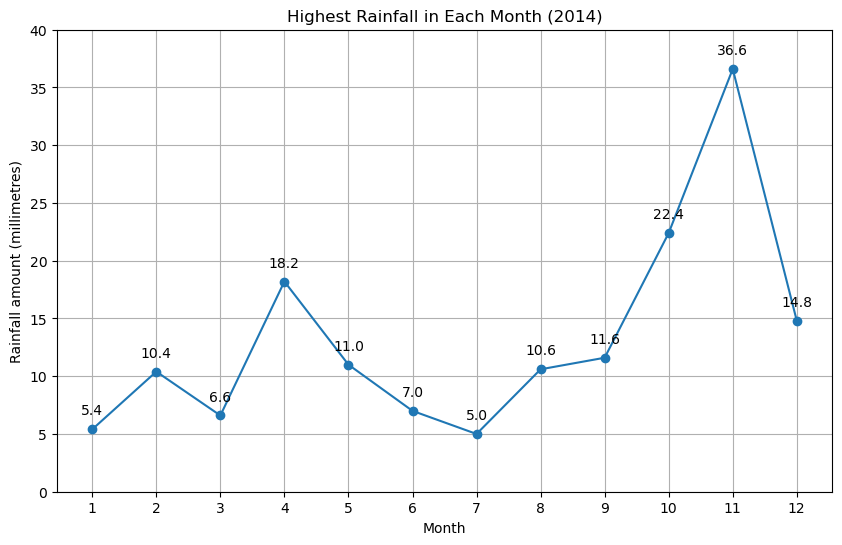

In [48]:
# Plot highest rainfall in each month
plt.figure(figsize=(10, 6))
plt.plot(highest_daily_rainfall.index, highest_daily_rainfall.values, marker='o', linestyle='-')

# Add value labels to each point
for month, rainfall in zip(highest_daily_rainfall.index, highest_daily_rainfall.values):
    plt.text(month, rainfall + 1, f'{rainfall:.1f}', ha='center', va='bottom')

plt.title('Highest Rainfall in Each Month (2014)')
plt.xlabel('Month')
plt.ylabel('Rainfall amount (millimetres)')
plt.xticks(range(1, 13))  # Set x-axis ticks to represent months
plt.ylim(0, 40) 
plt.grid(True)
plt.show()

**Interpretation:**

The plot clearly illustrates that the peak daily rainfall per month occurred predominantly during the final three months of the year 2014. July exhibited the lowest rainfall, while November experienced the highest rainfall.

## Task 2.2 

Explore the data between 2015 and 2017, and analyse them on both a yearly and monthly basis with visualizations.

To achieve the above requirement, we will use plotting libraries, matplotlib and seaborn (for heatmap) as shown below -

In [49]:
import seaborn as sns # To plot heatmap

# Filter data for the years 2015 to 2017
data_2015_to_2017 = DRC[(DRC['year'] >= 2015) & (DRC['year'] <= 2017)]
data_2015_to_2017.shape

(1096, 4)

#### Yearly Analysis:

To analyse the yearly total rainfall between 2015 and 2017, lets plot bar chart. 

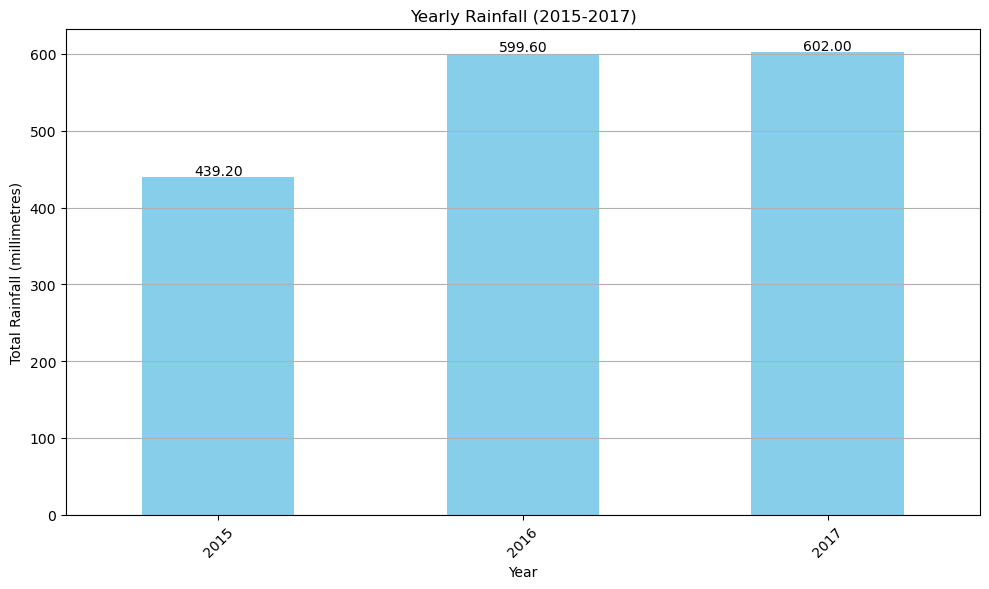

In [50]:
# Get total rainfall amount per year
yearly_rainfall_2015_to_2017 = data_2015_to_2017.groupby('year')['Rainfall_mm'].sum()

# Plot yearly rainfall
plt.figure(figsize=(10, 6))
bars = yearly_rainfall_2015_to_2017.plot(kind='bar', color='skyblue')
plt.title('Yearly Rainfall (2015-2017)')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (millimetres)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Add value labels to the plot
for bar in bars.patches:
    plt.annotate(format(bar.get_height(), '.2f'), 
                 (bar.get_x() + bar.get_width() / 2, 
                  bar.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 5), 
                 textcoords='offset points')

plt.tight_layout()
plt.show()

In [51]:
# Print descriptive statistics
print("Descriptive statistics of the total yearly rainfall between 2015 and 2017:")
print(yearly_rainfall_2015_to_2017.describe())

Descriptive statistics of the total yearly rainfall between 2015 and 2017:
count      3.000000
mean     546.933333
std       93.307520
min      439.200000
25%      519.400000
50%      599.600000
75%      600.800000
max      602.000000
Name: Rainfall_mm, dtype: float64


**Interpretation:**

Based on the bar chart and the descriptive statistics, in 2017, the total rainfall for the year was the highest at 602 mm, just slightly more than the 599 mm recorded in 2016. In contrast, 2015 had a lower rainfall total of only 439 mm. The average rainfall over the 3 years was 547 mm.

#### Monthly Analysis:

To analyse the monthly total rainfall between 2015 and 2017, lets use heatmap. 

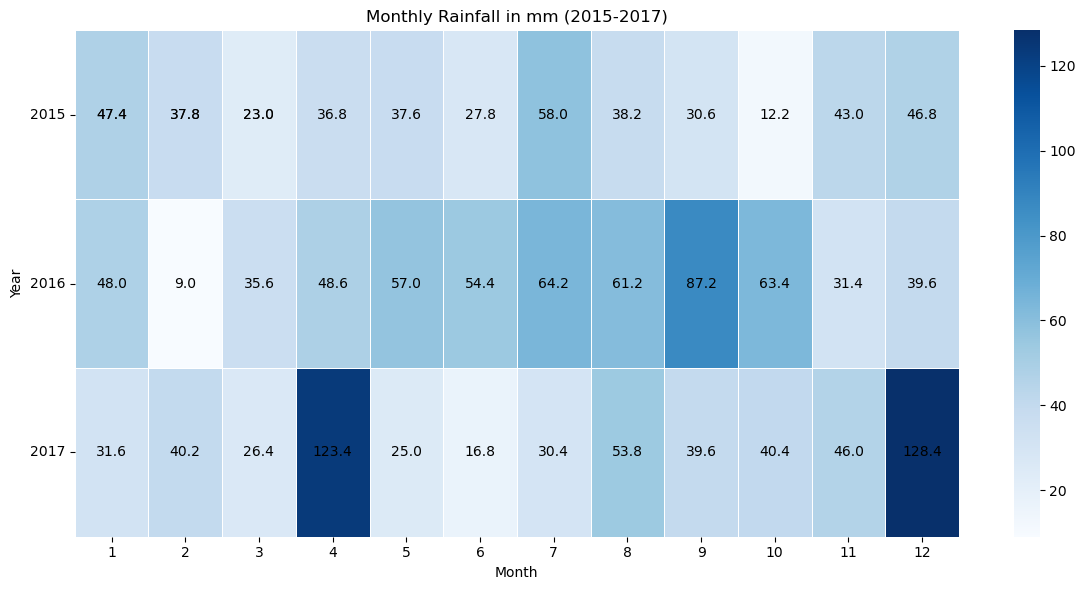

In [52]:
# For the monthly analysis, we group the data by both year and month, calculate the total rainfall for each month, and reshape the data using the unstack method.
monthly_rainfall = data_2015_to_2017.groupby(['year', 'month'])['Rainfall_mm'].sum().unstack()

# Plot monthly rainfall
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(monthly_rainfall, cmap='Blues', annot=True, fmt=".1f", linewidths=.5)

# Add value labels to each cell
for i in range(len(monthly_rainfall)):
    for j in range(len(monthly_rainfall.columns)):
        heatmap.text(j + 0.5, i + 0.5, f'{monthly_rainfall.iloc[i, j]:.1f}', ha='center', va='center', color='black')

plt.title('Monthly Rainfall in mm (2015-2017)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Additionally, lets plot a trend chart -

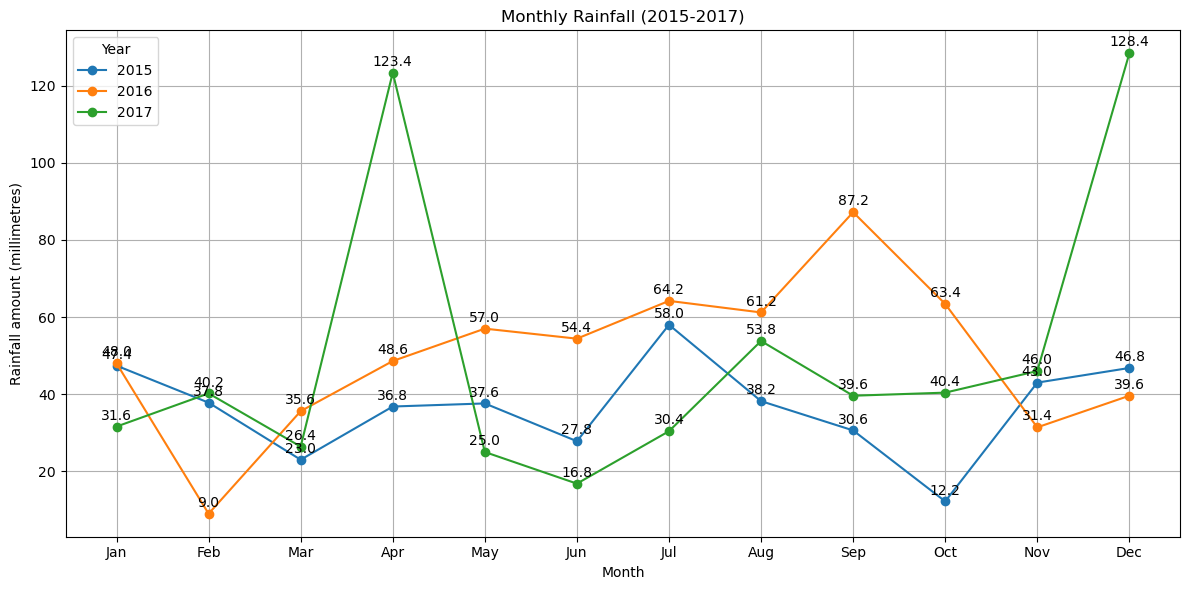

In [53]:
# Plot line chart for rainfall per month between 2015 and 2017
plt.figure(figsize=(12, 6))
for year in [2015, 2016, 2017]:
    plt.plot(range(1, 13), monthly_rainfall.loc[year], marker='o', label=str(year))

    # Add value labels to each point
    for month, rainfall in enumerate(monthly_rainfall.loc[year], start=1):
        rounded_rainfall = round(rainfall, 1)
        plt.text(month, rainfall + 1, f'{rounded_rainfall:.1f}', ha='center', va='bottom')

plt.title('Monthly Rainfall (2015-2017)')
plt.xlabel('Month')
plt.ylabel('Rainfall amount (millimetres)')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

In [54]:
# Print descriptive statistics
print("Descriptive statistics of the total monthly rainfall between 2015 and 2017:")
print(data_2015_to_2017.groupby(['year', 'month'])['Rainfall_mm'].sum().describe())

Descriptive statistics of the total monthly rainfall between 2015 and 2017:
count     36.000000
mean      45.577778
std       25.210101
min        9.000000
25%       31.200000
50%       39.900000
75%       53.950000
max      128.400000
Name: Rainfall_mm, dtype: float64


**Interpretation:**

Based on the heatmap, trend charts and descriptive statistics,

- December 2017 recorded the highest monthly rainfall, reaching 128 mm, followed closely by April of the same year with 123 mm.
- Conversely, February 2016 experienced the lowest rainfall, registering only 9 mm.
- The average monthly rainfall over the 3 years was 45 mm.

## Task 2.3 

Explore the data, and find the top 3 years with the highest rainfall amount and the top 3 years with the lowest rainfall amount, then compare them.

To find the top 3 years with the highest and lowest rainfall amounts and compare them, we will : 

- Group the data by year and calculate the total rainfall for each year.
- Sort the years based on rainfall amounts to find the top 3 highest and lowest rainfall years.
- Perform descriptive analysis of the rainfall amounts for the top and bottom years.
- Visualize the comparison using bar plots.

In [55]:
# Group the data by year and calculate total rainfall for each year
yearly_rainfall = DRC.groupby('year')['Rainfall_mm'].sum()

# Find the top 3 years with the highest rainfall
top_3_highest_rainfall = yearly_rainfall.nlargest(3)

# Find the top 3 years with the lowest rainfall
top_3_lowest_rainfall = yearly_rainfall.nsmallest(3)
top_3_lowest_rainfall

# Perform descriptive analysis of rainfall amounts for the top and bottom years
top_3_highest_stats = yearly_rainfall.loc[top_3_highest_rainfall.index].describe()
top_3_lowest_stats = yearly_rainfall.loc[top_3_lowest_rainfall.index].describe()

<Figure size 1000x600 with 0 Axes>

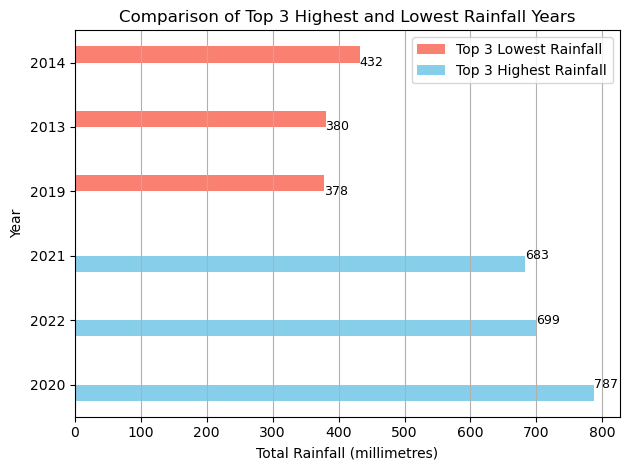

In [56]:
# Create a new DataFrame for visualization
comparison_data = pd.concat([top_3_highest_rainfall, top_3_lowest_rainfall], axis=1)
comparison_data.columns = ['Top 3 Highest Rainfall', 'Top 3 Lowest Rainfall']


# Plotting using horizontal bar plot
plt.figure(figsize=(10, 6))
comparison_data.plot(kind='barh', color=['skyblue', 'salmon'], legend='reverse')
plt.title('Comparison of Top 3 Highest and Lowest Rainfall Years')
plt.xlabel('Total Rainfall (millimetres)')
plt.ylabel('Year')
plt.grid(axis='x')

# Add value labels
for index, value in enumerate(comparison_data['Top 3 Highest Rainfall'].dropna()): # dropping NaN values. year 2020 has NaN value for the 'Top 3 Lowest Rainfall' column and likewise 
    plt.text(value, index, f'{value:.0f}', ha='left', va='center', fontsize=9)

for index, value in enumerate(comparison_data['Top 3 Lowest Rainfall'].dropna()):
    plt.text(value, index + len(comparison_data) // 2, f'{value:.0f}', ha='left', va='center', fontsize=9) # .0f is used to avoid value label exceeding beyond plot area

plt.tight_layout()
plt.show()

In [57]:
# Print descriptive statistics for the top and bottom years
print("Descriptive statistics for top 3 highest rainfall years:")
print(top_3_highest_stats)
print("\nDescriptive statistics for top 3 lowest rainfall years:")
print(top_3_lowest_stats)

Descriptive statistics for top 3 highest rainfall years:
count      3.000000
mean     722.933333
std       55.944377
min      682.600000
25%      691.000000
50%      699.400000
75%      743.100000
max      786.800000
Name: Rainfall_mm, dtype: float64

Descriptive statistics for top 3 lowest rainfall years:
count      3.00000
mean     396.60000
std       30.68485
min      377.60000
25%      378.90000
50%      380.20000
75%      406.10000
max      432.00000
Name: Rainfall_mm, dtype: float64


**Interpretation:**

Based on the horizontal bar chart and descriptive statistics,
- The years 2019, 2013, and 2014 exhibited the least total rainfall, measuring 378 mm, 380 mm, and 432 mm, respectively.
- Conversely, the years 2020, 2022, and 2021 recorded the highest rainfall amounts, reaching 787 mm, 699 mm, and 683 mm, respectively.
- The average highest rainfall among the top three years stands at 722 mm, while the average lowest rainfall among the bottom three years stands at 396 mm. mm.

## Task 2.4

Explore the changes of rainfall in ABC City in the last 10 years.

To explore the changes in rainfall in ABC City over the last 10 years, lets first filter the data to include only the last 10 years. Group the data by year and calculate the total rainfall for each year. Visualize the yearly rainfall trend over the last 10 years.

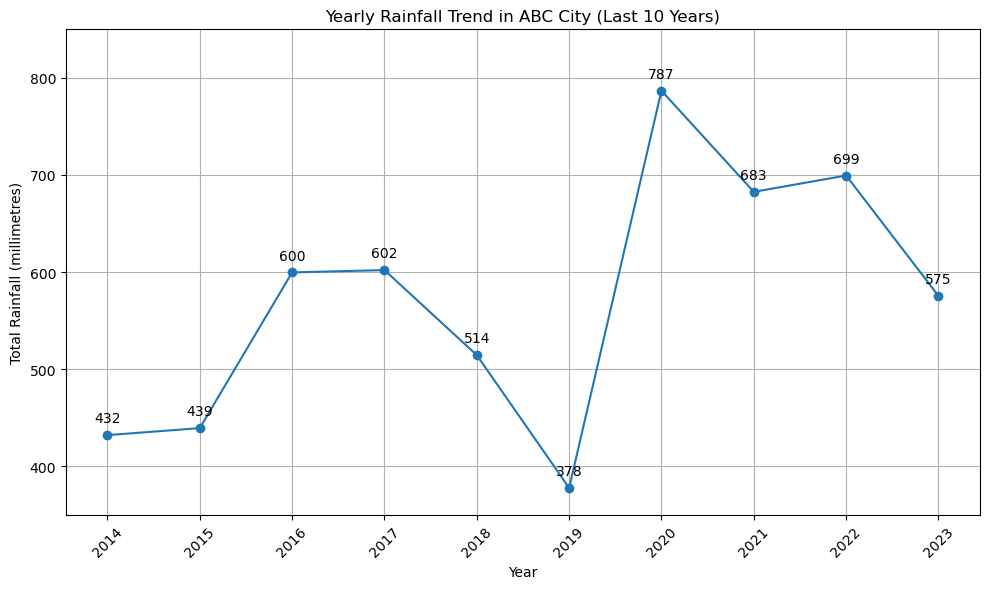

In [58]:
# Convert 'Year', 'Month', and 'Day' columns to datetime format
DRC['Date'] = pd.to_datetime(DRC[['year', 'month', 'day']])

# Convert 'Date' column to datetime format
DRC['Date'] = pd.to_datetime(DRC['Date'])

# Filter the data to include only the last 10 years
last_10_years_data = DRC[DRC['year'] >= DRC['year'].max() - 9]

# Group the data by year and calculate total rainfall for each year
yearly_rainfall_last_10_years = last_10_years_data.groupby('year')['Rainfall_mm'].sum()

# Plotting the yearly rainfall trend over the last 10 years
plt.figure(figsize=(10, 6))
plt.plot(yearly_rainfall_last_10_years.index, yearly_rainfall_last_10_years.values, marker='o', linestyle='-')
plt.title('Yearly Rainfall Trend in ABC City (Last 10 Years)')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (millimetres)')
plt.xticks(yearly_rainfall_last_10_years.index, rotation=45)
plt.ylim(350, 850)
plt.grid(True)

# Add value labels
for year, rainfall in zip(yearly_rainfall_last_10_years.index, yearly_rainfall_last_10_years.values):
    plt.text(year, rainfall + 10, f'{rainfall:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [59]:
# Get descriptive statistics
yearly_rainfall_last_10_years_stats = yearly_rainfall_last_10_years.describe()

# Print descriptive statistics
print("Descriptive statistics for last 10 yearly rainfall:")
print(yearly_rainfall_last_10_years_stats)


Descriptive statistics for last 10 yearly rainfall:
count     10.000000
mean     570.900000
std      131.067557
min      377.600000
25%      458.000000
50%      587.500000
75%      662.450000
max      786.800000
Name: Rainfall_mm, dtype: float64


**Interpretation:**

Based on the trend chart and descriptive statistics,
- Throughout the 10-year period, the maximum annual rainfall occurred in 2020, reaching 787 mm, while the minimum was observed in 2019, at 378 mm.
- The variation in total annual rainfall over the 10 years does not exhibit a discernible pattern. 
- On average, the yearly rainfall over the decade amounted to 570 mm.
- The spread of data around the mean was measured to be 131 mm.


---